# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [29]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Loading done...")

Loading done...


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [30]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Number of vaildation examples.
n_valid = len(X_valid)

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = y_train.max()+1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

'Speed limit (50km/h)', Occurrence in the data set:2010


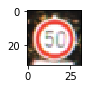

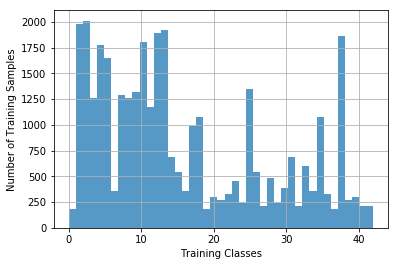

In [31]:
import random
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, n_train)
image = X_train[index]

sign_explanation =['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',
'Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)','No passing',
'No passing for vehicles over 3.5 metric tons','Right-of-way at the next intersection','Priority road','Yield',
'Stop','No vehicles','Vehicles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
'Road work','Traffic signals','Pedestrians', 'Children crossing','Bicycles crossing','Beware of ice/snow',
'Wild animals crossing', 'End of all speed and passing limits','Turn right ahead','Turn left ahead','Ahead only',
'Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
'End of no passing','End of no passing by vehicles over 3.5 metric tons']

plt.figure(figsize=(1,1))
plt.imshow(image)
print("'" + sign_explanation[y_train[index]] + "', Occurrence in the data set:" + str(np.count_nonzero(y_train == y_train[index] )))
plt.figure()
plt.hist(y_train,n_classes, alpha=0.75)
plt.xlabel('Training Classes')
plt.ylabel('Number of Training Samples')
plt.grid(True)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [32]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

shape=(1,32,32,1)
X_train_grayscale = np.empty([len(X_train),32,32,1])
X_test_grayscale = np.empty([len(X_test),32,32,1])
X_valid_grayscale = np.empty([len(X_valid),32,32,1])

# Converting Images to Grayscale and normalizing to [-1,1] via OpenCV
for i in range(0, len(X_train)):
    grayscale = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)
    X_train_grayscale[i] = np.reshape(cv2.normalize(grayscale,grayscale,alpha = -1, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F), shape)
    
for i in range(0, len(X_test)):
    grayscale = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)
    X_test_grayscale[i] = np.reshape(cv2.normalize(grayscale,grayscale,alpha = -1, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F), shape)

for i in range(0, len(X_valid)):
    grayscale = cv2.cvtColor(X_valid[i], cv2.COLOR_RGB2GRAY)
    X_valid_grayscale[i] = np.reshape(cv2.normalize(grayscale,grayscale,alpha = -1, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F), shape)
      
X_train = X_train_grayscale
X_test = X_test_grayscale
X_valid = X_valid_grayscale



### Model Architecture

In [33]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE =128
mu = 0
sigma = 0.01

  # Input
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, 43)

  # Variables.
wc1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma), name="wc1")
bc1 = tf.Variable(tf.zeros(16), name="bc1")  
wc2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma), name="wc2") 
bc2 = tf.Variable(tf.zeros(32), name="bc2")  
fc1_W = tf.Variable(tf.truncated_normal(shape=(800,800), mean = mu, stddev = sigma), name="fc1_W")
fc1_b = tf.Variable(tf.zeros(800), name="fc1_b")
fc2_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma), name="fc2_W")
fc2_b = tf.Variable(tf.zeros(400), name="fc2_b")
fc3_W = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma), name="fc3_W")
fc3_b = tf.Variable(tf.zeros(43), name="fc3_b")
    

  
saver = tf.train.Saver()


def LeNet(x):    
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Determination of the filter shape:
    # (height, width, input_depth, output_depth)
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    conv1 = tf.nn.conv2d(x, wc1, strides = [1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, bc1)
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x32.
    conv2 = tf.nn.conv2d(conv1, wc2, strides = [1, 1, 1, 1], padding='VALID') 
    conv2 = tf.nn.bias_add(conv2, bc2)  
    
    # Activation.
    conv2 = tf.nn.relu(conv2)  
    
    conv2 = tf.nn.local_response_normalization(conv2)
    
    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten. Input = 5x5x32. Output = 800
    fc0 = tf.contrib.layers.flatten(conv2)
        
    # Layer 3: Fully Connected. Input = 800. Output = 800.
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Dropout Layer
    fc1 = tf.nn.dropout(fc1, keep_prob=0.5)
    
    # Activation.
    fc1 = tf.nn.relu(fc1)    

    # Layer 4: Fully Connected. Input = 800. Output = 800.
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2 = tf.nn.dropout(fc2, keep_prob=0.5)
    
    # Activation.

    fc2 = tf.nn.relu(fc2)  
    
    #  Layer 5: Fully Connected. Input = 800. Output = 43.
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b
    
    #fc3 = tf.nn.dropout(fc3, keep_prob=0.5)
    
       
    return fc3

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [34]:
from sklearn.utils import shuffle
# Training Pipeline 
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [35]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [36]:
# Training 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './p2')
    print("Model saved")
    

Training...

EPOCH 1 ...
Training Accuracy = 0.597
Validation Accuracy = 0.548

EPOCH 2 ...
Training Accuracy = 0.895
Validation Accuracy = 0.837

EPOCH 3 ...
Training Accuracy = 0.951
Validation Accuracy = 0.896

EPOCH 4 ...
Training Accuracy = 0.963
Validation Accuracy = 0.913

EPOCH 5 ...
Training Accuracy = 0.978
Validation Accuracy = 0.918

EPOCH 6 ...
Training Accuracy = 0.976
Validation Accuracy = 0.920

EPOCH 7 ...
Training Accuracy = 0.984
Validation Accuracy = 0.925

EPOCH 8 ...
Training Accuracy = 0.985
Validation Accuracy = 0.928

EPOCH 9 ...
Training Accuracy = 0.988
Validation Accuracy = 0.933

EPOCH 10 ...
Training Accuracy = 0.990
Validation Accuracy = 0.941

EPOCH 11 ...
Training Accuracy = 0.991
Validation Accuracy = 0.945

EPOCH 12 ...
Training Accuracy = 0.986
Validation Accuracy = 0.929

EPOCH 13 ...
Training Accuracy = 0.993
Validation Accuracy = 0.936

EPOCH 14 ...
Training Accuracy = 0.993
Validation Accuracy = 0.942

EPOCH 15 ...
Training Accuracy = 0.993
Valid

In [37]:
#Testing
with tf.Session() as sess:
    saver.restore(sess, './p2')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

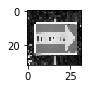

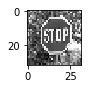

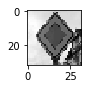

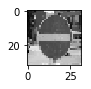

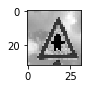

In [42]:

# Load image directly as Grayscale, preprocess images in the same way 

n_images = 5
img = np.empty([n_images,32,32,1])
file_list = ['examples/Einbahnstrasse.jpg', 'examples/stop.jpg', 'examples/vorfahrt.jpg', 'examples/Do-Not-Enter.jpg', 'examples/vorfahrt-kreuzung.jpg']
for i in range(0,5):
    img_ = cv2.imread(file_list[i],0)  # Directly read as grayscale
    img[i,:,:,0] = cv2.resize(img_,(32,32),interpolation=cv2.INTER_CUBIC)
    img[i,:,:,0] = cv2.normalize(img[i,:,:,0],img[i,:,:,0],alpha = -1, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    plt.figure(figsize=(1,1))
    plt.imshow(img[i,:,:,0], cmap='gray')
    plt.show()


### Predict the Sign Type for Each Image

In [43]:
logits = LeNet(x) 
prediction = tf.nn.softmax(logits)
top5 = tf.nn.top_k(prediction, k=5)

with tf.Session() as sess:
    # Load weights
    saver.restore(sess, './p2')
    print('Model restored with latest weights...')    
    top5_probability = sess.run(top5, feed_dict={x: img}) 
    print('Probabilities predicted...')  
    
print(top5_probability)


    

Model restored with latest weights...
Probabilities predicted...
TopKV2(values=array([[  6.99973702e-01,   9.78484899e-02,   6.19165599e-02,
          5.32946810e-02,   3.54381129e-02],
       [  8.55183601e-01,   1.42671794e-01,   1.46417995e-03,
          6.53233437e-04,   1.57420400e-05],
       [  1.00000000e+00,   1.08678494e-18,   1.55448421e-21,
          5.04860050e-28,   2.12354435e-29],
       [  1.00000000e+00,   3.36286638e-18,   7.41684953e-21,
          2.77084632e-24,   5.85570612e-25],
       [  1.00000000e+00,   8.74253915e-24,   4.29010717e-27,
          1.14519538e-28,   9.81984373e-29]], dtype=float32), indices=array([[14,  1, 38, 26, 34],
       [14,  1,  8,  0,  3],
       [12, 35, 40, 15, 13],
       [17, 23, 37, 26, 25],
       [11, 30, 28, 12, 21]], dtype=int32))


### Analyze Performance

Predicted for image 0: Stop


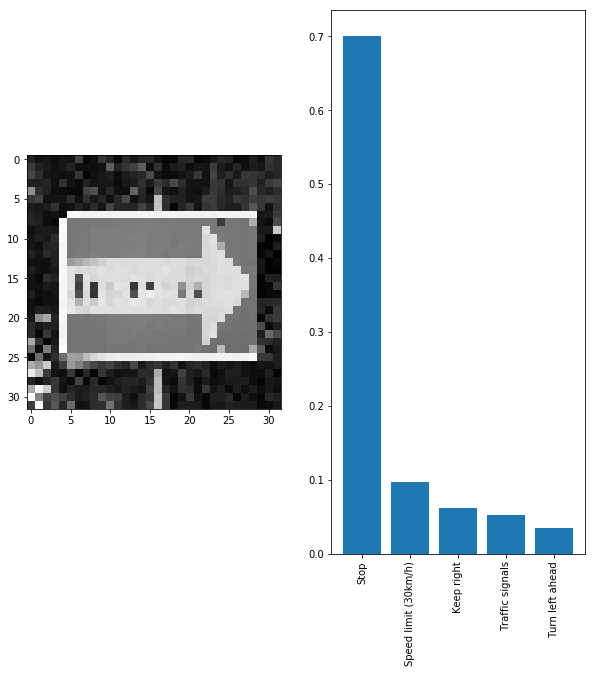

####################################################################################################
Predicted for image 1: Stop


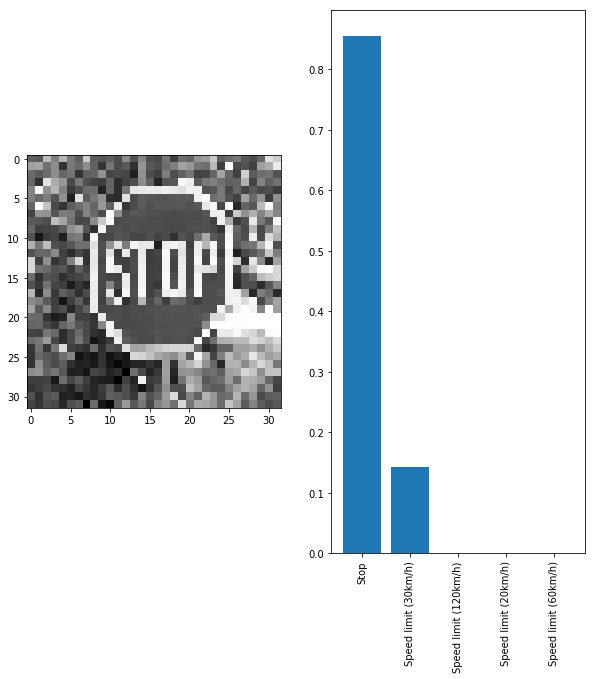

####################################################################################################
Predicted for image 2: Priority road


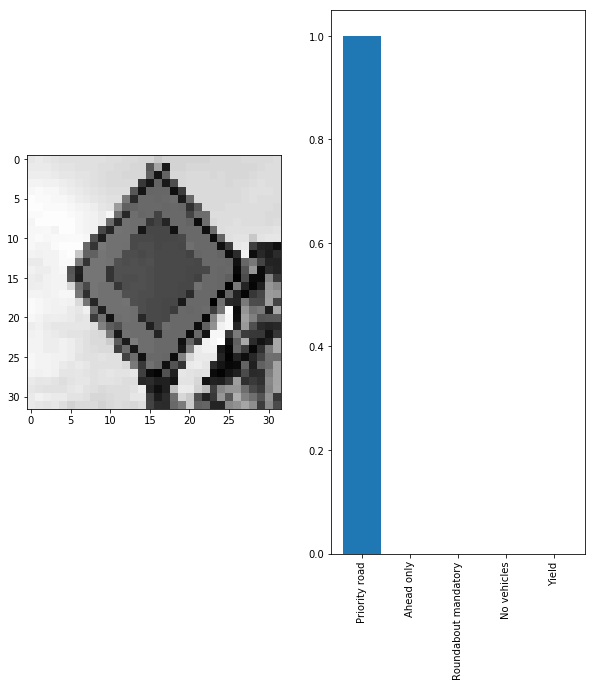

####################################################################################################
Predicted for image 3: No entry


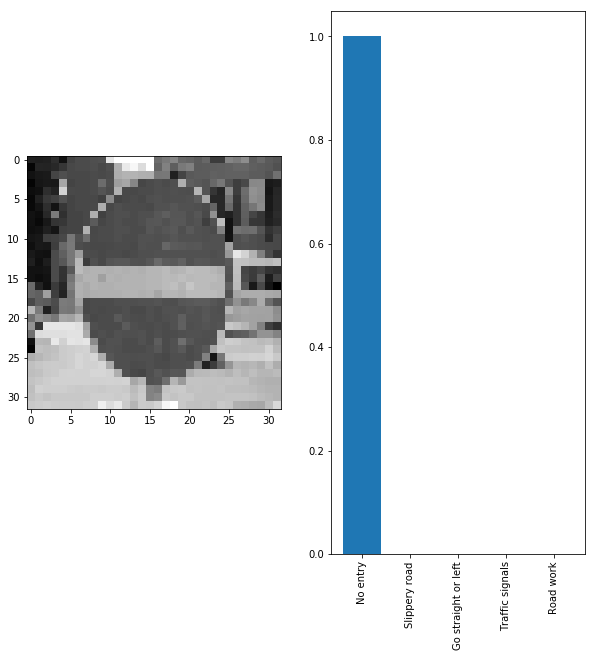

####################################################################################################
Predicted for image 4: Right-of-way at the next intersection


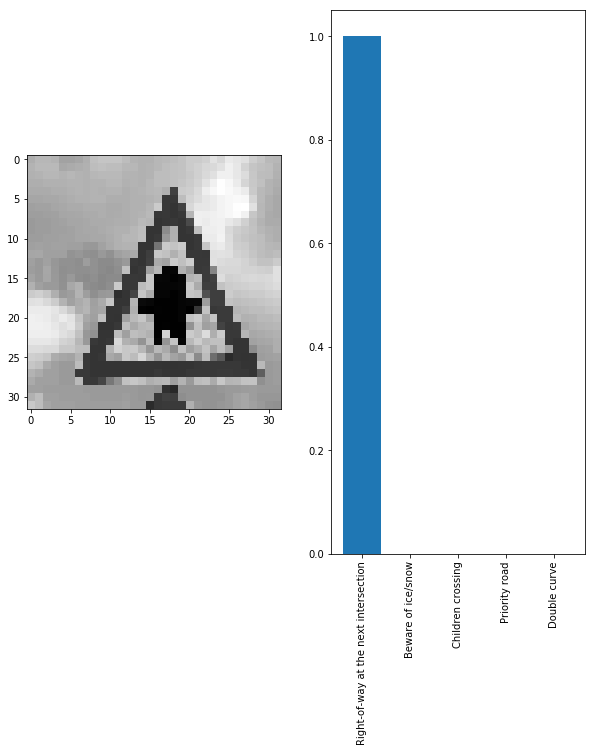

####################################################################################################


In [45]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
for i in range(0,5):
    print("Predicted for image " + str(i) + ": " + sign_explanation[top5_probability[1][i,0]])
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(img[i,:,:,0],cmap='gray')
  
    plt.subplot(122)
    x_axis = range(0,5) 
    labels = [sign_explanation[top5_probability[1][i,j]] for j in x_axis]
    plt.bar(x_axis,top5_probability[0][i])
    plt.xticks(x_axis, labels,  rotation=90)
    plt.show()
    print(100*"#")


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 